# Optimization




 Goal : In this assignment, you should fill the missing parts in order to optimize the circuit to reach 0.4 as the expectation value (PauliZ) of first qubit.


In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: autograd
    Found existing installation: autograd 1.6.2
    Uninstalling autograd-1.6.2:
      Successfully uninstalled autograd-1.6.2


In [3]:
import pennylane as qml
from pennylane import numpy as np

In [43]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=0)
    qml.RZ(params[1],wires=0)
    qml.RX(params[0],wires=1)
    qml.CNOT(wires=[0,1])
    return  qml.expval(qml.PauliZ(0)+qml.PauliX(1))# enter your code here (First graded assignment)

you should define the cost function in order to optimize circuit(params) in code cell below

In [44]:
def cost(params):
    return  np.abs(circuit(params)-0.4)**2# enter your code here (Second graded code)

In code cell below,







First you should set up your optimizer and learning rate






Second you have to initialize the learning parameter

In [45]:
# use gradient descent with learning rate 0.4

opt=qml.GradientDescentOptimizer(stepsize=0.4)#enter your code here (Third graded code)


steps = 100

# use np.random.rand to initialize params

params=np.random.rand(2)# enter your code here (Fourth graded code)

Cost_vec=[]
Function_Val =[]
for i in range(steps):
    params = opt.step(cost, params)
    Cost_vec.append(cost(params))
    Function_Val.append(circuit(params))

if your codes are correct, you should receive (tensor(0.4, requires_grad=True))

In [46]:
circuit(params)

tensor(0.4, requires_grad=True)

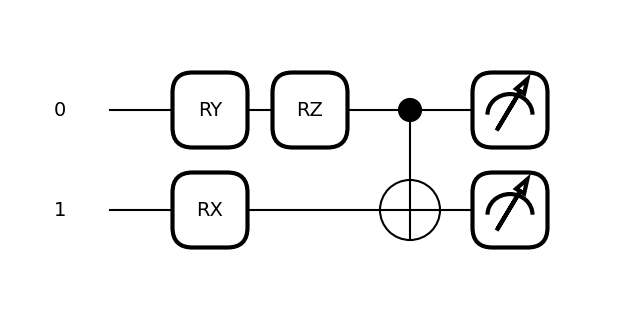

In [47]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(params)
plt.show()

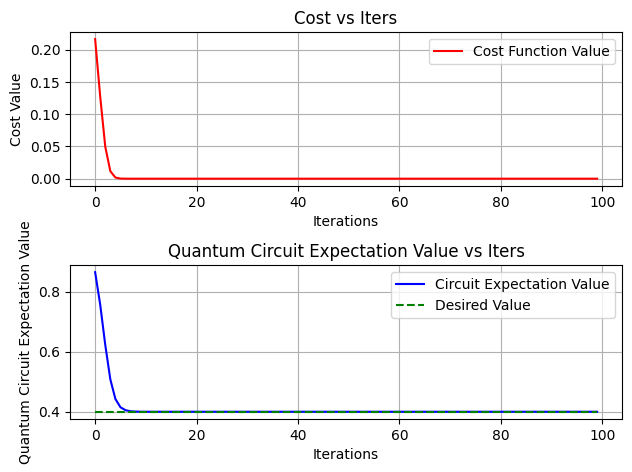

In [48]:
from matplotlib import pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1)



ax1.plot(Cost_vec, color='red')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost Value')
ax1.set_title('Cost vs Iters')
ax1.legend(['Cost Function Value'])
ax1.grid()


ax2.plot(Function_Val, color='b')
ax2.plot(0.4*np.ones(len(Function_Val)), color='green',linestyle='dashed')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Quantum Circuit Expectation Value')
ax2.set_title('Quantum Circuit Expectation Value vs Iters')
ax2.legend(['Circuit Expectation Value','Desired Value'])
ax2.grid()

fig.tight_layout(pad=1.0)
plt.show()